# Projeto: Visualização do Aprendizado com Regularização (MNIST)

## 1. Importação de bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks

## 2. Carregamento e pré-processamento dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 3. Definição dos modelos

In [3]:
# Modelo A: Sem regularização
model_a = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelo B: Com Dropout e EarlyStopping
model_b = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## 4. Treinamento dos modelos

In [4]:
print("Treinando modelo A (sem regularização)...")
hist_a = model_a.fit(x_train, y_train,
                     epochs=30,
                     batch_size=128,
                     validation_split=0.2,
                     verbose=1)

print("\nTreinando modelo B (com Dropout + EarlyStopping)...")
hist_b = model_b.fit(x_train, y_train,
                     epochs=30,
                     batch_size=128,
                     validation_split=0.2,
                     callbacks=[early_stop],
                     verbose=1)

Treinando modelo A (sem regularização)...
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7948 - loss: 0.7110 - val_accuracy: 0.9480 - val_loss: 0.1867
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9496 - loss: 0.1727 - val_accuracy: 0.9594 - val_loss: 0.1361
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9684 - loss: 0.1124 - val_accuracy: 0.9675 - val_loss: 0.1115
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9772 - loss: 0.0777 - val_accuracy: 0.9685 - val_loss: 0.1027
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9805 - loss: 0.0661 - val_accuracy: 0.9709 - val_loss: 0.0981
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9726 - val_loss: 0.0900
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9879 - loss: 0.0417 - val_accuracy: 0.9743 - val_loss: 0.0870
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy

## 5. Gráficos comparativos

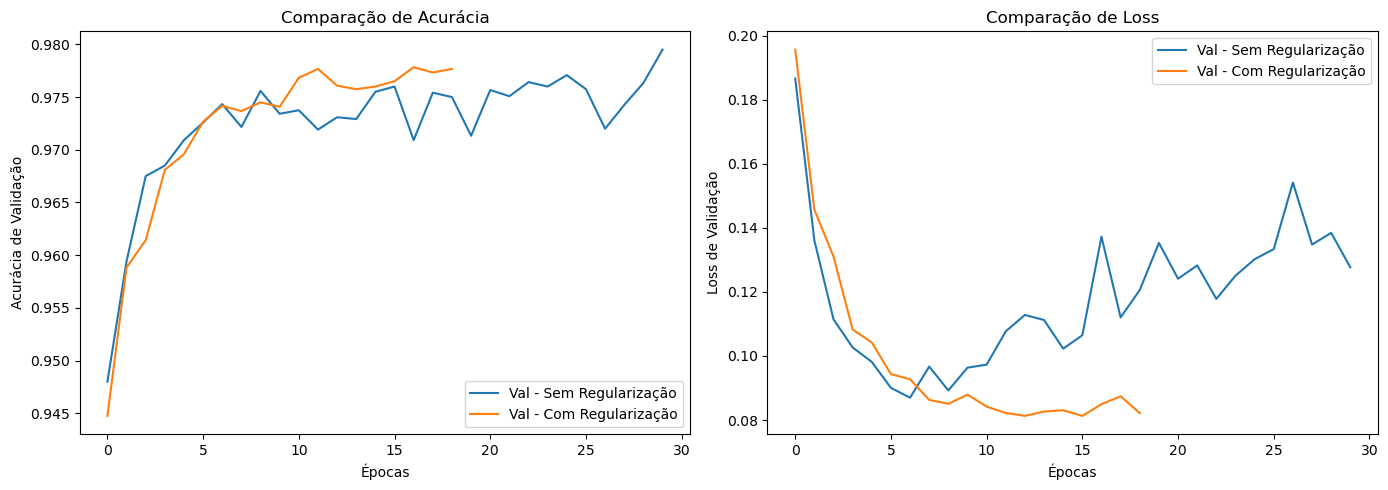

In [5]:
plt.figure(figsize=(14, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(hist_a.history['val_accuracy'], label='Val - Sem Regularização')
plt.plot(hist_b.history['val_accuracy'], label='Val - Com Regularização')
plt.xlabel('Épocas')
plt.ylabel('Acurácia de Validação')
plt.title('Comparação de Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(hist_a.history['val_loss'], label='Val - Sem Regularização')
plt.plot(hist_b.history['val_loss'], label='Val - Com Regularização')
plt.xlabel('Épocas')
plt.ylabel('Loss de Validação')
plt.title('Comparação de Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Conclusão
"""
A regularização com Dropout e EarlyStopping ajudou a evitar overfitting no modelo B.

- A curva de loss validação estabiliza mais cedo no modelo com regularização.
- O gap entre treino e validação é menor.
- A acurácia final se mantém estável com menos épocas.

Essa visualização mostra claramente como técnicas de regularização melhoram a generalização de redes neurais.
"""
